# PHSX 616: Measuring the Speed of Light
## Dr. Micheal Murray
## Brady Dunne and Christian Argueta

# Now we'll do the same for the 0.5 Mhz

In [609]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [610]:
# Read in the data from two columns in a .csv file
df = pd.read_csv("10 Mhz - 67 - Ch1 - F0001CH1.csv")
xArray = df["Time"].values
yArray = df["Volts"].values
df = pd.read_csv("10 Mhz - 67 - Ch2 - F0001CH2.csv")
xArray1 = df["Time"].values
yArray1 = df["Volts"].values


In [611]:
# scale xArray
xArray_scale = np.array([])

for x in xArray:
    value = x*(20000000)
    xArray_scale = np.append(xArray_scale,value)

In [612]:
# scale yArray
yArray_scale = np.array([])

for y in yArray:
    value = y*(20)
    yArray_scale = np.append(yArray_scale,value)

In [613]:
# scale xArray1
xArray_scale1 = np.array([])

for x in xArray1:
    value = x*(20000000)
    xArray_scale1 = np.append(xArray_scale1,value)

In [614]:
# scale yArray
yArray_scale1 = np.array([])

for y in yArray1:
    value = y*(1/8)
    yArray_scale1 = np.append(yArray_scale1,value)

In [615]:
# define a function that will be the sine fit
def fit(x,a,b,c):
    return a*((np.sin(b*x-c)))

In [623]:
# fit the function to the data arrays
guess = [1, 3, 0]
popt, pcov = curve_fit(fit, xArray_scale, yArray_scale, guess)

print(popt)
error = np. sqrt(np.diag(pcov))
print(error)

# range to fit over
xFit = np.arange(-2.75, 2.75, 0.1)

[-1.24245372  3.14244683  0.79141343]
[0.00049873 0.00027974 0.00040383]


In [617]:
# fit the function to the data arrays with updated guess values
guess1 = [1, 3, 0]  # Updated guess values
popt1, pcov1 = curve_fit(fit, xArray_scale1, yArray_scale1, guess1)

print(popt1)

# range to fit over
xFit1 = np.arange(-2.75, 2.75, 0.1)

[ 1.07830972  3.14129221 -0.20794434]


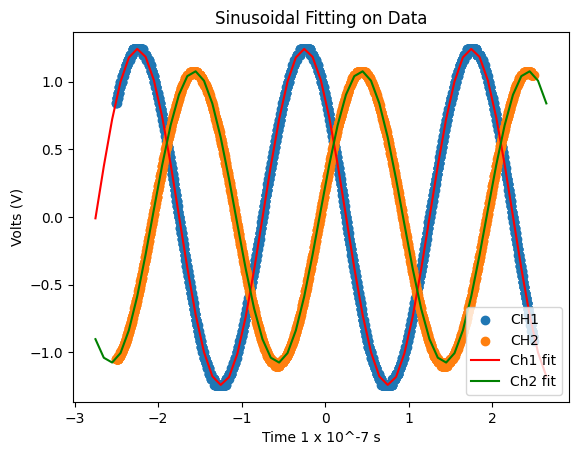

In [621]:
plt.scatter(xArray_scale, yArray_scale, label="CH1")
plt.scatter(xArray_scale1, yArray_scale1, label="CH2")
plt.plot(xFit, fit(xFit, *popt), color="r", label="Ch1 fit")
plt.plot(xFit1, fit(xFit1, *popt1), color="g", label="Ch2 fit")

plt.xlabel("Time 1 x 10^-7 s")
plt.ylabel("Volts (V)") 
plt.title('Sinusoidal Fitting on Data')
plt.legend()
plt.show()

In [619]:
time = popt[2]-popt1[2]
time

0.9993577712913481